In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file
df = pd.read_csv("/content/mymoviedb.csv", engine='python')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
!pwd

/content


In [65]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [67]:
df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [68]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [69]:
df.duplicated().sum()

0

In [70]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Count'] = df['Vote_Count'].fillna(0).astype(int)


In [71]:
print(df['Vote_Average'].unique())
print(df['Release_Date'].unique())

['8.3' '8.1' '6.3' '7.7' '7.0' '6.6' '6.8' '5.3' '7.2' '5.9' '7.3' '7.1'
 '5.1' '4.6' '6.0' '8.2' '5.4' '6.1' '8.4' '6.9' '5.8' '7.4' '7.8' '8.0'
 '6.2' '6.7' '7.6' '8.6' '4.8' '5.5' '7.9' '6.4' '7.5' '5.7' '2.2' '6.5'
 '0.0' '5.6' '5.2' '5.0' '8.5' '3.5' '4.0' '3.3' '4.7' '4.2' '4.3' '2.0'
 '4.1' '4.9' '8.7' '4.5' '9.1' '4.4' '3.6' None 'Animation' '2.8' '3.9'
 '3.8' '9.0' '3.0' '3.1' '3.7' '3.4' '8.9' '2.9' '8.8' '3.2' '1.5' '9.2'
 '2.5' '1.8' '2.4' '2.6' '10.0']
['2021-12-15' '2022-03-01' '2022-02-25' ... '1974-11-06' '1973-10-15'
 '1984-09-23']


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9837 non-null   int64  
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 691.8+ KB


In [73]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')


In [74]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Date'] = df['Release_Date'].dt.year.fillna(0).astype(int)

print(df)


      Release_Date                                 Title  \
0             2021               Spider-Man: No Way Home   
1             2022                            The Batman   
2             2022                               No Exit   
3             2021                               Encanto   
4             2021                        The King's Man   
...            ...                                   ...   
9832          1973                              Badlands   
9833          2020                      Violent Delights   
9834          2016                          The Offering   
9835          2021  The United States vs. Billie Holiday   
9836          1984                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.08

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9837 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 691.8+ KB


In [76]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Droping the columns
'Overview'
'Original_Language'
'Poster_Url'


In [77]:
cols = ['Overview',
'Original_Language',
'Poster_Url']

In [78]:
df.drop(cols, axis=1, inplace=True, errors='ignore')
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [79]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"



# Overview
*  Handled missing values by replacing or dropping them.
* Converted Release_Date to datetime format and extracted the year.
* Dropped unnecessary columns (e.g., Overview, Poster_Url).
* Changed data types (e.g., float to int).
* Removed duplicate rows for consistency.
* Verified and validated dataset structure and types.






     




#categorizing Vote_Average columns

*   Popular
*   Average
*   Below_avg
*   Not_Populer





In [80]:
def categorize_col(df, col, labels):
    # Calculate the edges based on statistical percentiles
    edges = [
        df[col].describe()['min'],   # Minimum value
        df[col].describe()['25%'],  # 25th percentile
        df[col].describe()['50%'],  # 50th percentile (median)
        df[col].describe()['75%'],  # 75th percentile
        df[col].describe()['max']   # Maximum value
    ]

    # Categorize the column values using pd.cut
    df[col] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True)
    return df




In [81]:
labels = ['Not_Populer', 'Below_avg', 'Average', 'Popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['Popular', 'Below_avg', 'Average', 'Not_Populer', NaN]
Categories (4, object): ['Not_Populer' < 'Below_avg' < 'Average' < 'Popular']

In [82]:
 df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [101]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [102]:
category_counts = df['Vote_Average'].value_counts(sort=False)
category_counts

,count
Vote_Average,
Not_Populer,6312
Below_avg,6348
Average,6612
Popular,6520


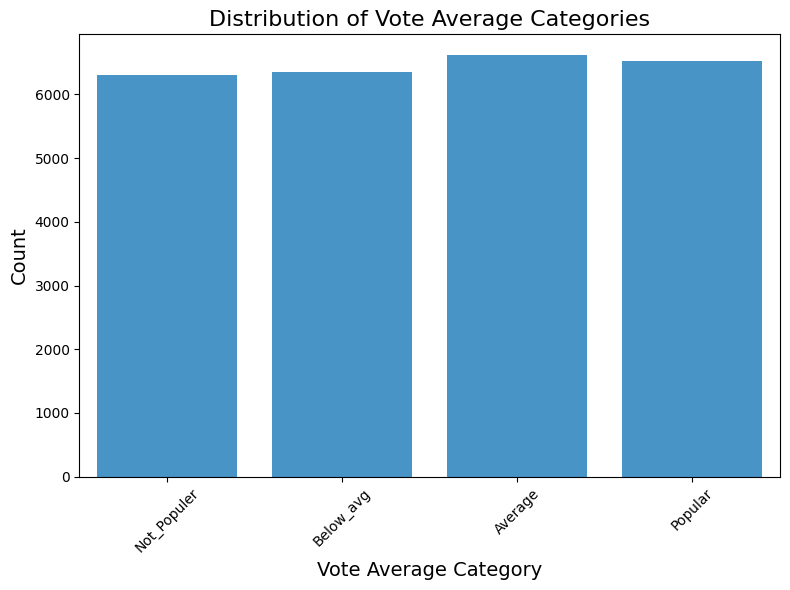

In [103]:
# Plot the bar graph with a custom color
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color="#3498db")  # Use a single color

# Customize the plot
plt.title("Distribution of Vote Average Categories", fontsize=16)
plt.xlabel("Vote Average Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


Overiew:
Categorized movies based on their vote averages into four groups: Not Popular, Below Average, Average, and Popular.
* Divided the Vote_Average column into quartiles using descriptive statistics.
* Assigned labels to represent different popularity levels.   
* Most movies are in the Below Average and Average categories.
* Fewer movies fall into the Not Popular and Popular categories.

Conclusion: The distribution highlights a concentration of movies around moderate ratings, with fewer extremes in high or low ratings.








# we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie


In [104]:
df['Genre'] = df ['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [105]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int64   
 4   Vote_Average  25792 non-null  category
 5   Genre         25792 non-null  category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 858.0+ KB


In [107]:
df.nunique()

,0
Release_Date,102
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,4
Genre,38


# Data Visualization

# what is the most frequent genre in the dataset?

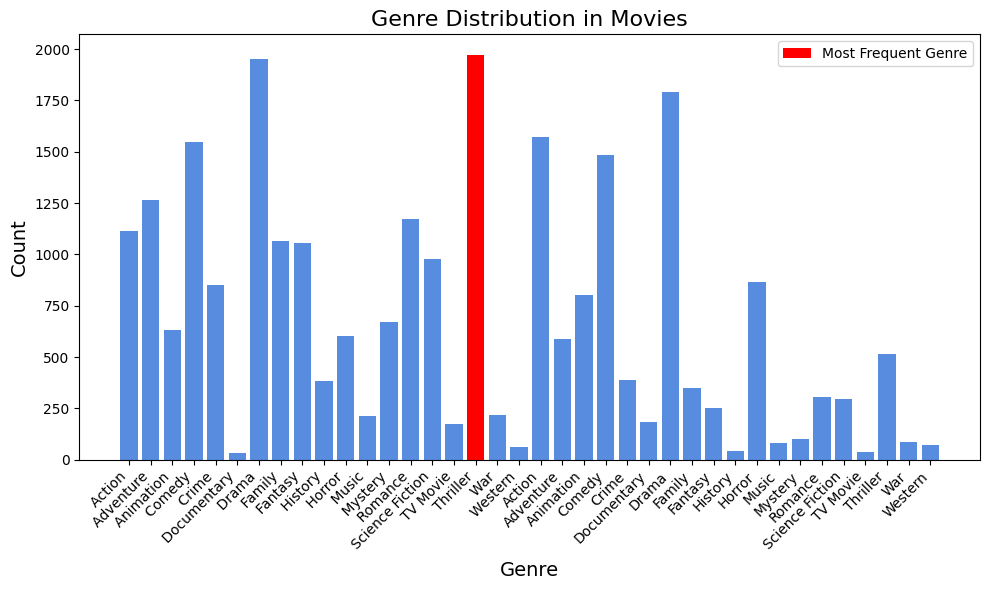

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Create the bar plot for all genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='#4287f5')

# Add title and labels
plt.title("Genre Distribution in Movies", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Highlight the most frequent genre
plt.bar(genre_counts.idxmax(), genre_counts.max(), color='red', label="Most Frequent Genre")

# Add a legend
plt.legend()


# Display the plot
plt.tight_layout()
plt.show()


we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres.

# What movie got the highest popularity ? what's its genre?[link text](https://)




In [115]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# What movie got the lowest popularity ? what's its genre?


In [116]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25789,1984,Threads,13.354,186,Popular,War
25790,1984,Threads,13.354,186,Popular,Drama
25791,1984,Threads,13.354,186,Popular,Science Fiction


# Which year has the most filmmed movies?

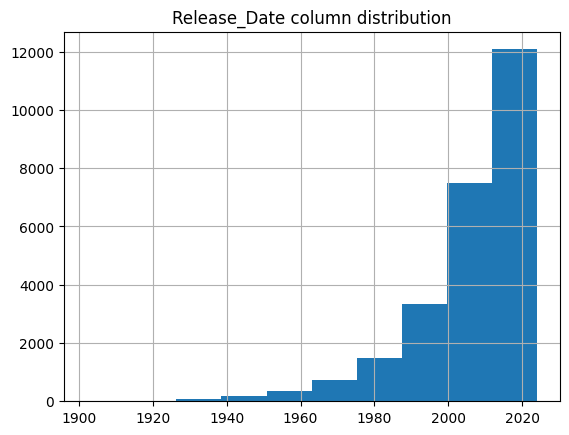

In [117]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

Overview

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

year 2020 has the highest filmming rate in our dataset.

Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.